In [23]:
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv

In [24]:
df = pd.read_csv('data2/StudentsPerformance.csv', index_col=0)

In [25]:
df.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,bachelor's degree,standard,none,72,72,74
female,group C,some college,standard,completed,69,90,88
female,group B,master's degree,standard,none,90,95,93
male,group A,associate's degree,free/reduced,none,47,57,44
male,group C,some college,standard,none,76,78,75


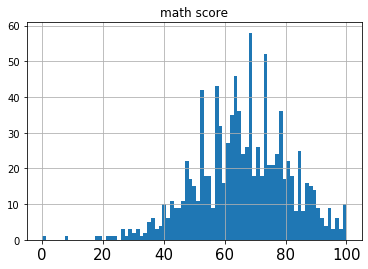

In [26]:
length = len(df["math score"].unique())
df.hist(column="math score",bins=length, xlabelsize=15)
plt.show()

In [27]:
fine_score=80

17 59 0.288135593220339


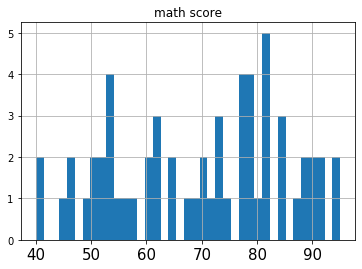

In [28]:
data2 = df[df['parental level of education'] == "master's degree"]
length = len(data2["math score"].unique())
fine=len(data2[data2['math score']>fine_score])
all=len(data2)
percent=fine/all
print(fine,all,percent)
data2.hist(column="math score",bins=length, xlabelsize=15)
plt.show()

25 118 0.211864406779661


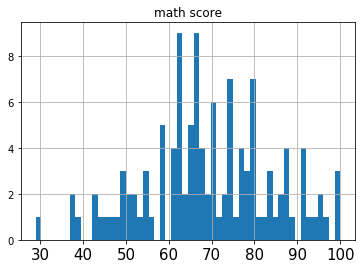

In [29]:
data2 = df[df['parental level of education'] == "bachelor's degree"]
length = len(data2["math score"].unique())
fine=len(data2[data2['math score']>fine_score])
all=len(data2)
percent=fine/all
print(fine,all,percent)
data2.hist(column="math score",bins=length, xlabelsize=15)
plt.show()

39 226 0.17256637168141592


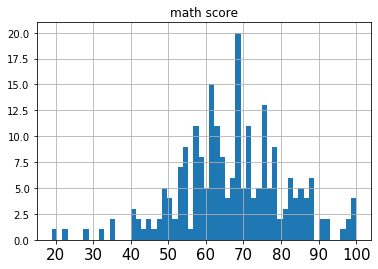

In [30]:
data2 = df[df['parental level of education'] == "some college"]
length = len(data2["math score"].unique())
fine=len(data2[data2['math score']>fine_score])
all=len(data2)
percent=fine/all
print(fine,all,percent)
data2.hist(column="math score",bins=length, xlabelsize=15)
plt.show()

In [31]:
#encode and bind
def eab(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [32]:
features_to_encode = ['race/ethnicity','parental level of education','lunch','test preparation course']
for feature in features_to_encode:
    df=eab(df, feature)

In [33]:
df.head()

,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
gender,,,,,,,,,,,,,,,,,,
female,72,72,74,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
female,69,90,88,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
female,90,95,93,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
male,47,57,44,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
male,76,78,75,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [34]:
df.to_csv('Education.csv', encoding='utf-8')

In [35]:
with open('Education.csv',encoding = "utf-8") as f:
    reader = csv.reader(f)
    data=[next(reader)]
    print(data)
    for row in reader:
        row[0] = True if "female" in row[0] else False
        data.append(row)

In [37]:
with open('Education.csv', 'w', encoding="utf-8") as f:
    writer = csv.writer(f)
    for row in data:
        writer.writerow(row)